<a href="https://colab.research.google.com/github/TaymoorAk/SMS-Classification/blob/master/Copy_of_Arabic_Sentimental_Analysis(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://www.kaggle.com/mksaad/arabic-sentiment-analysis-in-tweets-nb-bow
#https://github.com/saobou/arabic-text-preprocessing/blob/master/Preprocess.ipynb
import numpy as np 
import pandas as pd

In [0]:
import nltk
from nltk import NaiveBayesClassifier
from nltk.metrics.scores import f_measure, precision, recall
import collections
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [0]:
pos_dataset = pd.read_csv('train_Arabic_tweets_positive_20190413.tsv',sep='\t', encoding='utf-8')
pos_test = pd.read_csv('test_Arabic_tweets_positive_20190413.tsv', sep='\t', encoding='utf-8')

In [0]:
neg_dataset = pd.read_csv('train_Arabic_tweets_negative_20190413.tsv',sep='\t', encoding="utf-8")
neg_test = pd.read_csv('test_Arabic_tweets_negative_20190413.tsv',sep='\t', encoding='utf-8')

In [5]:
neg_dataset.head

<bound method NDFrame.head of       Sentiment                                               Text
0           neg  ุงุนุชุฑู ุงู ุจุชุณ ูุงูู ุดูู ุดูู ูุฌูุจู ุฑุงุณู ููู ุงูููู...
1           neg  ุชููุนุช ุงุฐุง ุฌุงุช ุฏุงุฑูุง ุจุดูููู ูุงูููู ุจุณ ูู ููุญูู ...
2           neg  #ุงูุงููู_ุงูููุงู ุงูุชุจ ุชููุนู ููุชูุฌุฉ ููุงุก ุงูููุงู ู...
3           neg  ูุนูุฉ ุงููุถุงุฏุงุช ุงูุญูููุฉ . ุชุถุน ูุทุฑุฉ๐งูุถุงุฏ ุจูุณููู ุน...
4           neg                             ุงูุฏูุฏู ุฌุงูู ุชููู ุนูู ๐
...         ...                                                ...
22509       neg  ููู ุชุฑู ุฃูุฑุงููุณ ูู ูุงู ููุน ููุงู ุงูููุฑ ุ ๐๐ ููู...
22510       neg                                  ุงุญุณุฏู ุนูู ุงูุงูู ๐
22511       neg                            ูุฃูู ูุฑุฉ ูุง ุจูููู ุณูุง ๐
22512       neg                                 ุจู

In [6]:
pos_dataset['Text'][1]

'ููู ุงูููุงูุฉ ูู ูุจูููฐ ูุนู ุขุญุฏุฅูุง ูู ุฑุฃููฐ ุงูุฌูุงู ูู ุฑูุญู ุฃูุงุงูููุจูุฑูู ุจุงููุธุงโฆ'

In [0]:
pos = pd.DataFrame(columns=['Text','Label'])

In [0]:
neg = pd.DataFrame(columns=['Text','Label'])

In [9]:
!pip install googletrans
from googletrans import Translator
translator = Translator()
translated = translator.translate(pos_dataset['Text'][1], src='ar', dest='en')
print(translated.text)

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=5b531f164ed825f37cc0b33745e97e491ecc785783e57774828ed2f0644931c5
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans
In the end, it will not stay Ahdala saw beauty in your soul Omaalmenbhron Balmaza ...


In [0]:
pos_tweets=[]
neg_tweets=[]
pos_sent=[]
neg_sent=[]
for i in range(len(pos_dataset)):
  pos_tweets.append(pos_dataset['Text'][i])
  pos_sent.append(1)

for i in range(len(pos_test)):
   pos_tweets.append(pos_test['Text'][i])
   pos_sent.append(1)

for i in range(len(neg_dataset)):
  neg_tweets.append(neg_dataset['Text'][i])
  neg_sent.append(0)

for i in range(len(neg_test)):
  neg_tweets.append(neg_test['Text'][i])
  neg_sent.append(0)

In [11]:
pos_tweets[1]

'ููู ุงูููุงูุฉ ูู ูุจูููฐ ูุนู ุขุญุฏุฅูุง ูู ุฑุฃููฐ ุงูุฌูุงู ูู ุฑูุญู ุฃูุงุงูููุจูุฑูู ุจุงููุธุงโฆ'

In [12]:
neg_tweets[1]

'ุชููุนุช ุงุฐุง ุฌุงุช ุฏุงุฑูุง ุจุดูููู ูุงูููู ุจุณ ูู ููุญูู ุงุญุณ ููู ุงุญุฏ ูุงูุตูู ๐ #Avlu'

In [0]:
text=[]
Label=[]
for tweet in pos_tweets:
  text.append(tweet)
  Label.append(1)
for tweet in neg_tweets:
  text.append(tweet)
  Label.append(0)

In [0]:
data = pd.DataFrame(columns=['Text'])

In [0]:
data['Text'] = text

In [16]:
data

Text
0      ูุญู ุงูุฐูู ูุชุญูู ูู ูุง ููุฏ ุฃู ููููู ุฅูู ุฏุนุงุก ูู...
1      ููู ุงูููุงูุฉ ูู ูุจูููฐ ูุนู ุขุญุฏุฅูุง ูู ุฑุฃููฐ ุงูุฌูุงู...
2                                        ูู ุงูุฎูุฑ ููุณู ๐
3      #ุฒูุฒู_ุงูููุนุจ_ูุตุฑูุง_ุจููุนุจ ูู ุนุงูู ุงูููู ููุง ุชุฑุถ...
4      ุงูุดูุก ุงููุญูุฏ ุงูุฐู ูุตููุง ููู ููุนุงูููุฉ ูู : ุงููุณ...
...                                                  ...
56790  ุงูููู ูุงูุช ููุณูุฑ ุฏู ุงุญุณุงุณ ุบุจู ุงููู ูู ูุด ูุงุฏุฑ ...
56791  ุงุณุชุดูุงุฏ_ุงูุงูุงู_ูุงุธู_ุงูุบูุธ ุงูุณูุงู ุนูู ุงููุนุฐุจ ูู...
56792                          ุงูุง ููุช ุงูู ุงูุตุญู ุจูุจุฑู ๐
56793  ููููุง ูู ุงูุด ุชุดูููุง .. ูุน ููุงุญุธุฉ ุงูุชูุทู ูุฃูู ุง...
56794  โ ุฅุฐุง ุฃุฑุฏุช ุฃู ุชุนุฑู ุดูุฆุง ุนูู ุฅุณุงููู ูุจู ุฃู ุชุณุฃู...

[56795 rows x 1 columns]

In [18]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
for sentence in data['Text']:
  word_tokenize(sentence)
 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
data

Text
0      ูุญู ุงูุฐูู ูุชุญูู ูู ูุง ููุฏ ุฃู ููููู ุฅูู ุฏุนุงุก ูู...
1      ููู ุงูููุงูุฉ ูู ูุจูููฐ ูุนู ุขุญุฏุฅูุง ูู ุฑุฃููฐ ุงูุฌูุงู...
2                                        ูู ุงูุฎูุฑ ููุณู ๐
3      #ุฒูุฒู_ุงูููุนุจ_ูุตุฑูุง_ุจููุนุจ ูู ุนุงูู ุงูููู ููุง ุชุฑุถ...
4      ุงูุดูุก ุงููุญูุฏ ุงูุฐู ูุตููุง ููู ููุนุงูููุฉ ูู : ุงููุณ...
...                                                  ...
56790  ุงูููู ูุงูุช ููุณูุฑ ุฏู ุงุญุณุงุณ ุบุจู ุงููู ูู ูุด ูุงุฏุฑ ...
56791  ุงุณุชุดูุงุฏ_ุงูุงูุงู_ูุงุธู_ุงูุบูุธ ุงูุณูุงู ุนูู ุงููุนุฐุจ ูู...
56792                          ุงูุง ููุช ุงูู ุงูุตุญู ุจูุจุฑู ๐
56793  ููููุง ูู ุงูุด ุชุดูููุง .. ูุน ููุงุญุธุฉ ุงูุชูุทู ูุฃูู ุง...
56794  โ ุฅุฐุง ุฃุฑุฏุช ุฃู ุชุนุฑู ุดูุฆุง ุนูู ุฅุณุงููู ูุจู ุฃู ุชุณุฃู...

[56795 rows x 1 columns]

### Arabic text cleaning

In [20]:
!pip install Tashaphyne
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from textblob import TextBlob
import re

from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer

stops = set(stopwords.words("arabic"))
stop_word_comp = {"ุ","ุขุถ","ุขูููู","ุขู","ุขูุงู","ุขู","ุฃ","ุฃุจ","ุฃุฌู","ุฃุฌูุน","ุฃุฎ","ุฃุฎุฐ","ุฃุตุจุญ","ุฃุถุญู","ุฃูุจู","ุฃูู","ุฃูุซุฑ","ุฃูุง","ุฃู","ุฃูุง","ุฃูุงูู","ุฃูุงููู","ุฃูุณู","ุฃููุง","ุฃู","ุฃูุง","ุฃูุช","ุฃูุชู","ุฃูุชูุง","ุฃูุชู","ุฃูุชู","ุฃูุดุฃ","ุฃููู","ุฃู","ุฃูุดู","ุฃููุฆู","ุฃููุฆูู","ุฃููุงุก","ุฃููุงูู","ุฃูููู","ุฃู","ุฃูุง","ุฃูู","ุฃูููุง","ุฃูู","ุฃูููู","ุฃููููู","ุฃูููู","ุฅุฐ","ุฅุฐุง","ุฅุฐุงู","ุฅุฐูุง","ุฅุฐู","ุฅูู","ุฅูููู","ุฅููููุง","ุฅููููู","ุฅูููู","ุฅูููููู","ุฅููุง","ุฅููุง","ุฅู","ุฅูููุง","ุฅู","ุฅูุงู","ุฅูุงูู","ุฅูุงููุง","ุฅูุงูู","ุฅูุงูุง","ุฅูุงู","ุฅูุงูุง","ุฅูุงูู","ุฅูุงููุง","ุฅูุงูู","ุฅูุงู","ุฅููู","ุฅูููู","ุง","ุงุจุชุฏุฃ","ุงุซุฑ","ุงุฌู","ุงุญุฏ","ุงุฎุฑู","ุงุฎูููู","ุงุฐุง","ุงุฑุจุนุฉ","ุงุฑุชุฏู","ุงุณุชุญุงู","ุงุทุงุฑ","ุงุนุงุฏุฉ","ุงุนููุช","ุงู","ุงูุซุฑ","ุงูุฏ","ุงูุฃูุงุก","ุงูุฃูู","ุงูุง","ุงูุงุฎูุฑุฉ","ุงูุงู","ุงูุงูู","ุงูุงููู","ุงูุชู","ุงูุชู","ุงูุซุงูู","ุงูุซุงููุฉ","ุงูุฐุงุชู","ุงูุฐู","ุงูุฐู","ุงูุฐูู","ุงูุณุงุจู","ุงูู","ุงููุงุฆู","ุงููุงุชู","ุงููุชุงู","ุงููุชูุง","ุงููุชูู","ุงููุฐุงู","ุงููุฐูู","ุงูููุงุชู","ุงููุงุถู","ุงูููุจู","ุงูููุช","ุงูู","ุงูููู","ุงูุง","ุงูุงู","ุงูุณ","ุงู","ุงูุจุฑู","ุงูููุจ","ุงูู","ุงููุง","ุงู","ุงูู","ุงู","ุงูุงุฑ","ุงูุงู","ุงูุถุง","ุจ","ุจุงุช","ุจุงุณู","ุจุงู","ุจุฎู","ุจุฑุณ","ุจุณุจุจ","ุจุณู","ุจุดูู","ุจุถุน","ุจุทุขู","ุจุนุฏ","ุจุนุถ","ุจู","ุจูู","ุจููุง","ุจูู","ุจู","ุจูู","ุจูุง","ุจูุงุฐุง","ุจูู","ุจู","ุจูุง","ุจู","ุจูุง","ุจู","ุจูุฏ","ุจูู","ุจูุณู","ุจููููู","ุจูุฆูุณู","ุชุงูู","ุชุงููู","ุชุจุฏูู","ุชุฌุงู","ุชุญููู","ุชููุงุก","ุชูู","ุชููู","ุชูููุง","ุชู","ุชููู","ุชููููู","ุชูู","ุชูู","ุซูุงุซุฉ","ุซู","ุซูู","ุซููุฉ","ุซูููู","ุฌุนู","ุฌูู","ุฌููุน","ุฌูุฑ","ุญุงุฑ","ุญุงุดุง","ุญุงููุง","ุญุงู","ุญุชู","ุญุฑู","ุญุณุจ","ุญู","ุญูุงูู","ุญูู","ุญูุซ","ุญูุซูุง","ุญูู","ุญููู","ุญูุจููุฐูุง","ุญูุชููู","ุญูุฐุงุฑู","ุฎูุง","ุฎูุงู","ุฏูู","ุฏููู","ุฐุง","ุฐุงุช","ุฐุงู","ุฐุงูู","ุฐุงูู","ุฐูู","ุฐููู","ุฐูููุง","ุฐููู","ุฐู","ุฐูุง","ุฐูุงุชุง","ุฐูุงุชู","ุฐูุช","ุฐููู","ุฐููููู","ุฐูู","ุฐูู","ุฑุงุญ","ุฑุฌุน","ุฑููุฏู","ุฑูุซ","ุฑูุจูู","ุฒูุงุฑุฉ","ุณุจุญุงู","ุณุฑุนุงู","ุณูุฉ","ุณููุงุช","ุณูู","ุณูู","ุณูุงุกู","ุณูุงุกูููุง","ุดุจู","ุดุฎุตุง","ุดุฑุน","ุดูุชููุงูู","ุตุงุฑ","ุตุจุงุญ","ุตูุฑ","ุตูู","ุตูู","ุถุฏ","ุถูู","ุทุงู","ุทุงููุง","ุทูู","ุทูู","ุธูู","ุนุงุฏ","ุนุงู","ุนุงูุง","ุนุงูุฉ","ุนุฏุง","ุนุฏุฉ","ุนุฏุฏ","ุนุฏู","ุนุณู","ุนุดุฑ","ุนุดุฑุฉ","ุนูู","ุนูู","ุนููู","ุนููู","ุนูููุง","ุนููู","ุนู","ุนูุฏ","ุนูุฏูุง","ุนูุถ","ุนูู","ุนูุฏูุณู","ุนููููุง","ุบุฏุง","ุบูุฑ","ู","ู","ูุงู","ููุงู","ูู","ูู","ูู","ููู","ูููุง","ููู","ูููุง","ูุงู","ูุงู","ูุจู","ูุฏ","ูุทู","ูููุง","ููุฉ","ูุฃูููุง","ูุฃูู","ูุฃูู","ูุฃููู","ูุงุฏ","ูุงู","ูุงูุช","ูุฐุง","ูุฐูู","ูุฑุจ","ูู","ููุง","ููุงููุง","ููุชุง","ููู","ูููููุง","ูููููุง","ููููุง","ููููุง","ูู","ููุง","ูู","ููุช","ููู","ููููุง","ููุฃูููู","ููุฎ","ูุฆู","ูุง","ูุงุช","ูุงุณููุง","ูุฏู","ูุฏู","ูุนูุฑ","ููุงุก","ูู","ููู","ูููุง","ููู","ููููููุง","ููู","ููููุง","ููุงูู","ูู","ููุง","ูููุง","ูู","ููุง","ูู","ููุง","ูู","ูููุงูุฉ","ูููุง","ูููุง","ูู","ููุณูุชู","ููุณูุชู","ููุณูุชูู","ููุณูุชูููุง","ููุณูุชูููู","ููุณูุชู","ููุณููู","ููุนูููู","ููููููู","ููููุชู","ููููุณู","ููููุณูุง","ููููุณูุชูุง","ููููุณูุชู","ููููุณููุง","ูููุณูููุง","ูุง","ูุงุงููู","ูุงุจุฑุญ","ูุงุฏุงู","ูุงุฐุง","ูุงุฒุงู","ูุงูุชุฆ","ูุงูู","ูุชู","ูุซู","ูุฐ","ูุณุงุก","ูุน","ูุนุงุฐ","ููุงุจู","ููุงููู","ููุงูููุง","ููุงูููู","ููุงููู","ูููุงุฑ","ููููู","ููุง","ููู","ูู","ููุฐ","ูููุง","ูู","ูููุง","ูููู","ููู","ูุญู","ูุญู","ูุนู","ููุณ","ููุณู","ููุงูุฉ","ููุฎู","ููุนูููุง","ููุนููู","ูุง","ูุงุคู","ูุงูู","ูุงููุง","ูุจู","ูุฐุง","ูุฐู","ููุฐุง","ูู","ููููู","ูููุง","ูู","ููุง","ูู","ููุง","ููุงู","ููุงูู","ูู","ูู","ููุง","ููุช","ูููุง","ููุคูุงุก","ููุงุชุงูู","ููุงุชููููู","ููุงุชูู","ููุงุชูู","ููุฌู","ููุฐุง","ููุฐุงูู","ููุฐููููู","ููุฐูู","ููุฐูู","ููููููุงุชู","ู","ู6","ูุง","ูุงุญุฏ","ูุงุถุงู","ูุงุถุงูุช","ูุงูุฏ","ูุงู","ูุงูุงู","ูุงูุถุญ","ูุฑุงุกูู","ููู","ููุงู","ููุงูุช","ููุฏ","ููู","ููุงู","ููุงูุช","ููุง","ููู","ููู","ููู","ููู","ููู","ูููุฃูู","ูููู","ููุดูููุงููู","ูููู","ูููู","ููู","ูุฃููุงู"}
ArListem = ArabicLightStemmer()


     |โโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโ| 245kB 7.1MB/s 
     |โโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโ| 102kB 11.0MB/s 
  Created wheel for pyarabic: filename=PyArabic-0.6.6-cp36-none-any.whl size=106208 sha256=b8fdd95b2fb227768eefb5aef400ebfc99998b149015d751eea206fb16f2a7a5
  Stored in directory: /root/.cache/pip/wheels/34/b5/2d/668d567e8c2b6f10309dbfaba5bfef6ea0b1c0f9f6fb37078f
Successfully built pyarabic
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Stemming

In [0]:
# def to_arabic(text):
#     return ds.transliterate(text)

def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)

#### Normalizing Text

In [0]:
import pyarabic.araby as araby
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[ุฅุฃูฑุขุง]", "ุง", text)
    text = re.sub("ู", "ู", text)
    text = re.sub("ุค", "ุก", text)
    text = re.sub("ุฆ", "ุก", text)
    text = re.sub("ุฉ", "ู", text)
    noise = re.compile(""" ู    | # Tashdid
                             ู    | # Fatha
                             ู    | # Tanwin Fath
                             ู    | # Damma
                             ู    | # Tanwin Damm
                             ู    | # Kasra
                             ู    | # Tanwin Kasr
                             ู    | # Sukun
                             ู     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

#### Stop Words Removal

In [0]:
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

### Dealing with Hashtags in string

In [0]:
def split_hashtag_to_words(tag):
    tag = tag.replace('#','')
    tags = tag.split('_')
    if len(tags) > 1 :
        
        return tags
    pattern = re.compile(r"[A-Z][a-z]+|\d+|[A-Z]+(?![a-z])")
    return pattern.findall(tag)

def clean_hashtag(text):
    words = text.split()
    text = list()
    for word in words:
        if is_hashtag(word):
            text.extend(extract_hashtag(word))
        else:
            text.append(word)
    return " ".join(text)
def is_hashtag(word):
    if word.startswith("#"):
        return True
    else:
        return False
def extract_hashtag(text):
    
    hash_list = ([re.sub(r"(\W+)$", "", i) for i in text.split() if i.startswith("#")])
    word_list = []
    for word in hash_list :
        word_list.extend(split_hashtag_to_words(word))
    return word_list

### MISC

In [0]:
def misc():
  import re
  import pyarabic.araby as araby

  import warnings
  warnings.filterwarnings("ignore", category=DeprecationWarning)

  # test sample
  tweet1 = u'ุฌููุฏ ุชูุจุฐู ุนุงููุง ุจุนุฏ ุนุงู ุชุนุจูุฑ ุนู ุชุฑุงุจุท ุงูุฌุณุฏ ุงููุงุญุฏ ูุฎุฏูุฉ ุถููู ุงูุฑุญููุ ุชุทุจูู ุชุฑุฌูุงู ุงููุงุฆุฒ ูู #ูุงูุงุซูู_ุงูุญุฌ ุงูุนุงู ุงููุงุถูุ ููุทูู ุงูููู ููุดุงุฑู ุงูุญุฌุงุฌ ุฃูุงููู ุงูุฑูุญุงููุฉ ููุณุงุนุฏูู ูู ุชุฑุฌูุฉ ุงูููุญ ุงูุฅุฑุดุงุฏูุฉ ูู ููุทูุฉ ุงูุญุฑู ุฏูู ุงูุญุงุฌุฉ ุฅูู ุงูุชุฑูุช @reem. #ุญุฌ_ุฐูู'



  # removes usernames inside a tweet text caused by to mentions or reply tweets
  def remove_usernames(input_txt, pattern):
      r = re.findall(pattern, input_txt)
      for i in r:
          input_txt = re.sub(i, '', input_txt)

      return input_txt

  # removes arabic letters tashkeel like (ู ูู ู  ู ู )
  def remove_tashkeel(input_txt):
      return araby.strip_tashkeel(input_txt)

  # removes a decorative letter (ู) which has no affect on words meaning
  def remove_tatweel(input_txt):
      return araby.strip_tatweel(input_txt)

  # normalizes the different forms of the letter hamza (ุฆ ุค) into a single form (ุก)
  def normalize_hamza(input_txt):
      r = re.findall(u'ุฆ',input_txt);
      e = re.findall(u'ุค',input_txt);
      for i in r:
          input_txt= re.sub(i, u'ุก', input_txt)
      for i in e:
          input_txt= re.sub(i, u'ุก', input_txt)
      return input_txt

  # normalizes the different forms of the letter alef (ุข ุฃ ุฅ) into a single form (ุง)
  def normalize_alef(input_txt):
      r = re.findall(u'ุฃ',input_txt);
      e = re.findall(u'ุฅ',input_txt);
      o = re.findall(u'ุข', input_txt);
      for i in r:
          input_txt= re.sub(i, u'ุง', input_txt)
      for i in e:
          input_txt= re.sub(i, u'ุง', input_txt)
      for i in o:
          input_txt= re.sub(i, u'ุง', input_txt)
      return input_txt

  # normalizes the different forms of the letter yeh (ู ู) into a single form (ู)
  def normalize_yeh(input_txt):
      r = re.findall(u'ู', input_txt)
      for i in r:
          input_txt = re.sub(i, u'ู', input_txt)
      return input_txt

  # normalizes the different forms of the letter heh (ู ุฉ) into a single form (ุฉ)
  def normalize_heh(input_txt):
      r = re.findall(u'ู', input_txt)
      for i in r:
          input_txt = re.sub(i, u'ุฉ', input_txt)
      return input_txt

  # combining all preprocessing functions together for testing samples
  def full_preprocessing_steps(tweet):

      print("Tweet before preprocessing: " + tweet)

      usernames_free = remove_usernames(tweet,  "@[\w]*")
      tashkeel_free = remove_tashkeel(usernames_free)
      tatweel_free = remove_tatweel(tashkeel_free)
      hamza_normalized = normalize_hamza(tatweel_free)
      alef_normalized = normalize_alef(hamza_normalized)
      yeh_normalized = normalize_yeh(alef_normalized)
      heh_normalized = normalize_heh(yeh_normalized)

      print("Tweet after preprocessing: " + heh_normalized)

  full_preprocessing_steps(tweet1)

In [0]:
def clean_tweet(text):
    text = re.sub('#\d+K\d+', ' ', text)  # years like 2K19
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('@[^\s]+',' ',text)
    text = clean_hashtag(text)
    # text = clean_emoji(text)
    return text

#### DEMOJI


In [0]:
def demoji(sentence):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  sentence = emoji_pattern.sub(r'', sentence)
  return sentence

#### Cleaning Data

In [0]:
def clean_text(text):
    ## Clean for tweets
    text = clean_tweet(text)
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,ุ-./:;<=>ุ?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ## Remove Emojis
    text = demoji(text)
    ## Convert text to lowercases
    text = text.lower()
    ## Arabisy the text
    # text = to_arabic(text)
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    #Stemming
    #text = stem(text)
    return text

In [0]:
data['Text'] = data['Text'].apply(lambda x:clean_text(x))

In [29]:
data['Text'][1]

'ุงูููุงูู ูุจูููฐ ูุนู ุงุญุฏุงูุง ุฑุงููฐ ุงูุฌูุงู ุฑูุญู ุงูุงุงูููุจูุฑูู ุจุงููุธุงโฆ'

#### Common Words Removal

In [0]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:12]
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#### Rare words removal

In [0]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-50:]
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [0]:
data['Labels'] = Label

In [33]:
data

Text  Labels
0      ูุชุญูู ููุฏ ููููู ุฏุนุงุก ููู ุชุจุญุซูุง ูููุง ุงููุง ููุณู...       1
1      ุงูููุงูู ูุจูููฐ ูุนู ุงุญุฏุงูุง ุฑุงููฐ ุงูุฌูุงู ุฑูุญู ุงูุงุง...       1
2                                                              1
3      ุฒูุฒู ุงูููุนุจ ูุตุฑูุง ุจููุนุจ ูู ุนุงูู ุงูููู ุชุฑุถู ุจุบู...       1
4      ุงูุดูุก ุงููุญูุฏ ูุตููุง ููุนุงูููู ุงููุณูุงุฑ ุชุฑู ูุงููุง ...       1
...                                                  ...     ...
56790  ุงูููู ูุงูุช ููุณูุฑ ุฏู ุงุญุณุงุณ ุบุจู ูุด ูุงุฏุฑ ุชูุงู ูุงุฒ...       0
56791  ุงุณุชุดูุงุฏ ุงูุงูุงู ูุงุธู ุงูุบูุธ ุงูุณูุงู ุงููุนุฐุจ ูุนุฑ ุงู...       0
56792                                ููุช ุงูู ุงูุตุญู ุจูุจุฑู       0
56793          ููููุง ุงูุด ุชุดูููุง ููุงุญุธู ุงูุชูุทู ูุงูู ุงูููุฏ       0
56794  ุงุฑุฏุช ุชุนุฑู ุดูุกุง ุนูู ุงุณุงููู ุชุณุงู ุบูุฑู ูุนุดุงู ุงูุชุง...       0

[56795 rows x 2 columns]

### Final Cleaning and Preparing Dataset

In [0]:
# def avg_word(sentence):
#     words = sentence.split()
#     if len(words) == 0:
#         return 0
#     return (sum(len(word) for word in words)/len(words))

# data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
# data['char_count'] = data['Text'].str.len() ## this also includes spaces
# data['avg_char_per_word'] = data['Text'].apply(lambda x: avg_word(x))
# stop = stopwords.words('arabic')
# data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
# data = data.sort_values(by='word_count',ascending=[0])
# final = []
# for index, row in data.iterrows():
#     if len(row['Text'].split()) > 3:
#         final.append([row['Text'],row['Labels']])
# df = pd.DataFrame(final)
# df.columns = ['Text','Sentiment']
# df.to_csv('final_data.csv',index=False)
def deEmojify(data):
  for sentence in data["Text"]:
    sentence.encode('ascii', 'ignore').decode('ascii')
  return data

deEmojify(data)

In [34]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index()
data.head

<bound method NDFrame.head of                                                     Text  Labels
27915                                       ุณุฎูู ุงูุตุฑุงุญู       1
36308  ููุจุฑ ููุณุทูู ุชุนูู ุงุฒุนุงุฌ ุงููุงุกู ุงุซูุงุก ูููู ูุกุฏู ...       0
5816                       ุชุชูุณู ูุงุดูุกุงุก ุญุงููุช ูุชุฎูู ุนูฺฉ       1
14449  ุงูููู ููู ูุณู ุนูููู ุงูููู ุงูุญุจ ุนูุถุง ุนูู ุฎุฐู ุงู...       1
49127                            ุฑุจูุง ูุนุงู ุญุจูุจู ุงูู ุฌุงู       0
...                                                  ...     ...
10688  ูุนุจู ูุงูุซุฑ ููุฐุง ุณุจุจ ุชุญูู ุงุนูุงูู ูุฏุนู ููุงูุณูู ู...       1
26092                              ุฌุนูู ูุงุชููุฏ ุบุงูู ุนุฒูุฒ       1
21323                                              ุจูููู       1
23914                                       ูุจุนุฏุด ูุงุฌููู       1
42451  ุงููู ุงูุชู ุฎุฏูุฏู ุงูุญูู ุฏุงู

In [35]:
from sklearn.model_selection import train_test_split
data.dropna()
X_train, X_test, Y_train, Y_test = train_test_split(data['Text'],data['Labels'], test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(51115,) (51115,)
(5680,) (5680,)


### Translated

In [0]:
!pip install googletrans
from googletrans import Translator
translator = Translator()


In [0]:
d = ''' ุจูุงุฒูุง ููุชุงููู ูุนูุงุฌ ุชุณุงูุท ุงูุดุนุฑ 
+ููุฒู ูุชุบุฐูุฉ ุงูุดุนุฑ ููุท800RS

ุฒุฑุงุนุฉ ุงูุงุณูุงู ุงูุงูุฑูููุฉ ููุท3600RS
ููุญุฌุฒ 0125108000 '''
translated = translator.translate(d, src='ar', dest='en')
print(translated.text)

In [0]:
# from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 60000
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 100

In [0]:
# tokenizer = Tokenizer(num_words=MAX_NB_WORDS,lower=False)
# tokenizer.fit_on_texts(np.concatenate((X_train, X_test)).ravel())

In [0]:
Y_train = pd.get_dummies(Y_train).values
Y_test = pd.get_dummies(Y_test).values


In [0]:
Y_train[1]

In [0]:
# from keras.preprocessing.sequence import pad_sequences
# X_train_tokenized = pad_sequences(tokenizer.texts_to_sequences(X_train.values.ravel()),maxlen=MAX_SEQUENCE_LENGTH)
# X_test_tokenized = pad_sequences(tokenizer.texts_to_sequences(X_test.values.ravel()),maxlen=MAX_SEQUENCE_LENGTH)

In [0]:
# X_train_tokenized.shape

In [0]:
# X_train_tokenized[1]

In [0]:
# from sklearn import decomposition
# pca = decomposition.PCA(n_components=100)
# pca.fit(X_train_tokenized)
# X_train_tokenized = pca.transform(X_train_tokenized)

In [0]:
# x_train[1]

In [38]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(max_features=MAX_SEQUENCE_LENGTH, encoding='utf-8',stop_words=["ุ","ุขุถ","ุขูููู","ุขู","ุขูุงู","ุขู","ุฃ","ุฃุจ","ุฃุฌู","ุฃุฌูุน","ุฃุฎ","ุฃุฎุฐ","ุฃุตุจุญ","ุฃุถุญู","ุฃูุจู","ุฃูู","ุฃูุซุฑ","ุฃูุง","ุฃู","ุฃูุง","ุฃูุงูู","ุฃูุงููู","ุฃูุณู","ุฃููุง","ุฃู","ุฃูุง","ุฃูุช","ุฃูุชู","ุฃูุชูุง","ุฃูุชู","ุฃูุชู","ุฃูุดุฃ","ุฃููู","ุฃู","ุฃูุดู","ุฃููุฆู","ุฃููุฆูู","ุฃููุงุก","ุฃููุงูู","ุฃูููู","ุฃู","ุฃูุง","ุฃูู","ุฃูููุง","ุฃูู","ุฃูููู","ุฃููููู","ุฃูููู","ุฅุฐ","ุฅุฐุง","ุฅุฐุงู","ุฅุฐูุง","ุฅุฐู","ุฅูู","ุฅูููู","ุฅููููุง","ุฅููููู","ุฅูููู","ุฅูููููู","ุฅููุง","ุฅููุง","ุฅู","ุฅูููุง","ุฅู","ุฅูุงู","ุฅูุงูู","ุฅูุงููุง","ุฅูุงูู","ุฅูุงูุง","ุฅูุงู","ุฅูุงูุง","ุฅูุงูู","ุฅูุงููุง","ุฅูุงูู","ุฅูุงู","ุฅููู","ุฅูููู","ุง","ุงุจุชุฏุฃ","ุงุซุฑ","ุงุฌู","ุงุญุฏ","ุงุฎุฑู","ุงุฎูููู","ุงุฐุง","ุงุฑุจุนุฉ","ุงุฑุชุฏู","ุงุณุชุญุงู","ุงุทุงุฑ","ุงุนุงุฏุฉ","ุงุนููุช","ุงู","ุงูุซุฑ","ุงูุฏ","ุงูุฃูุงุก","ุงูุฃูู","ุงูุง","ุงูุงุฎูุฑุฉ","ุงูุงู","ุงูุงูู","ุงูุงููู","ุงูุชู","ุงูุชู","ุงูุซุงูู","ุงูุซุงููุฉ","ุงูุฐุงุชู","ุงูุฐู","ุงูุฐู","ุงูุฐูู","ุงูุณุงุจู","ุงูู","ุงููุงุฆู","ุงููุงุชู","ุงููุชุงู","ุงููุชูุง","ุงููุชูู","ุงููุฐุงู","ุงููุฐูู","ุงูููุงุชู","ุงููุงุถู","ุงูููุจู","ุงูููุช","ุงูู","ุงูููู","ุงูุง","ุงูุงู","ุงูุณ","ุงู","ุงูุจุฑู","ุงูููุจ","ุงูู","ุงููุง","ุงู","ุงูู","ุงู","ุงูุงุฑ","ุงูุงู","ุงูุถุง","ุจ","ุจุงุช","ุจุงุณู","ุจุงู","ุจุฎู","ุจุฑุณ","ุจุณุจุจ","ุจุณู","ุจุดูู","ุจุถุน","ุจุทุขู","ุจุนุฏ","ุจุนุถ","ุจู","ุจูู","ุจููุง","ุจูู","ุจู","ุจูู","ุจูุง","ุจูุงุฐุง","ุจูู","ุจู","ุจูุง","ุจู","ุจูุง","ุจู","ุจูุฏ","ุจูู","ุจูุณู","ุจููููู","ุจูุฆูุณู","ุชุงูู","ุชุงููู","ุชุจุฏูู","ุชุฌุงู","ุชุญููู","ุชููุงุก","ุชูู","ุชููู","ุชูููุง","ุชู","ุชููู","ุชููููู","ุชูู","ุชูู","ุซูุงุซุฉ","ุซู","ุซูู","ุซููุฉ","ุซูููู","ุฌุนู","ุฌูู","ุฌููุน","ุฌูุฑ","ุญุงุฑ","ุญุงุดุง","ุญุงููุง","ุญุงู","ุญุชู","ุญุฑู","ุญุณุจ","ุญู","ุญูุงูู","ุญูู","ุญูุซ","ุญูุซูุง","ุญูู","ุญููู","ุญูุจููุฐูุง","ุญูุชููู","ุญูุฐุงุฑู","ุฎูุง","ุฎูุงู","ุฏูู","ุฏููู","ุฐุง","ุฐุงุช","ุฐุงู","ุฐุงูู","ุฐุงูู","ุฐูู","ุฐููู","ุฐูููุง","ุฐููู","ุฐู","ุฐูุง","ุฐูุงุชุง","ุฐูุงุชู","ุฐูุช","ุฐููู","ุฐููููู","ุฐูู","ุฐูู","ุฑุงุญ","ุฑุฌุน","ุฑููุฏู","ุฑูุซ","ุฑูุจูู","ุฒูุงุฑุฉ","ุณุจุญุงู","ุณุฑุนุงู","ุณูุฉ","ุณููุงุช","ุณูู","ุณูู","ุณูุงุกู","ุณูุงุกูููุง","ุดุจู","ุดุฎุตุง","ุดุฑุน","ุดูุชููุงูู","ุตุงุฑ","ุตุจุงุญ","ุตูุฑ","ุตูู","ุตูู","ุถุฏ","ุถูู","ุทุงู","ุทุงููุง","ุทูู","ุทูู","ุธูู","ุนุงุฏ","ุนุงู","ุนุงูุง","ุนุงูุฉ","ุนุฏุง","ุนุฏุฉ","ุนุฏุฏ","ุนุฏู","ุนุณู","ุนุดุฑ","ุนุดุฑุฉ","ุนูู","ุนูู","ุนููู","ุนููู","ุนูููุง","ุนููู","ุนู","ุนูุฏ","ุนูุฏูุง","ุนูุถ","ุนูู","ุนูุฏูุณู","ุนููููุง","ุบุฏุง","ุบูุฑ","ู","ู","ูุงู","ููุงู","ูู","ูู","ูู","ููู","ูููุง","ููู","ูููุง","ูุงู","ูุงู","ูุจู","ูุฏ","ูุทู","ูููุง","ููุฉ","ูุฃูููุง","ูุฃูู","ูุฃูู","ูุฃููู","ูุงุฏ","ูุงู","ูุงูุช","ูุฐุง","ูุฐูู","ูุฑุจ","ูู","ููุง","ููุงููุง","ููุชุง","ููู","ูููููุง","ูููููุง","ููููุง","ููููุง","ูู","ููุง","ูู","ููุช","ููู","ููููุง","ููุฃูููู","ููุฎ","ูุฆู","ูุง","ูุงุช","ูุงุณููุง","ูุฏู","ูุฏู","ูุนูุฑ","ููุงุก","ูู","ููู","ูููุง","ููู","ููููููุง","ููู","ููููุง","ููุงูู","ูู","ููุง","ูููุง","ูู","ููุง","ูู","ููุง","ูู","ูููุงูุฉ","ูููุง","ูููุง","ูู","ููุณูุชู","ููุณูุชู","ููุณูุชูู","ููุณูุชูููุง","ููุณูุชูููู","ููุณูุชู","ููุณููู","ููุนูููู","ููููููู","ููููุชู","ููููุณู","ููููุณูุง","ููููุณูุชูุง","ููููุณูุชู","ููููุณููุง","ูููุณูููุง","ูุง","ูุงุงููู","ูุงุจุฑุญ","ูุงุฏุงู","ูุงุฐุง","ูุงุฒุงู","ูุงูุชุฆ","ูุงูู","ูุชู","ูุซู","ูุฐ","ูุณุงุก","ูุน","ูุนุงุฐ","ููุงุจู","ููุงููู","ููุงูููุง","ููุงูููู","ููุงููู","ูููุงุฑ","ููููู","ููุง","ููู","ูู","ููุฐ","ูููุง","ูู","ูููุง","ูููู","ููู","ูุญู","ูุญู","ูุนู","ููุณ","ููุณู","ููุงูุฉ","ููุฎู","ููุนูููุง","ููุนููู","ูุง","ูุงุคู","ูุงูู","ูุงููุง","ูุจู","ูุฐุง","ูุฐู","ููุฐุง","ูู","ููููู","ูููุง","ูู","ููุง","ูู","ููุง","ููุงู","ููุงูู","ูู","ูู","ููุง","ููุช","ูููุง","ููุคูุงุก","ููุงุชุงูู","ููุงุชููููู","ููุงุชูู","ููุงุชูู","ููุฌู","ููุฐุง","ููุฐุงูู","ููุฐููููู","ููุฐูู","ููุฐูู","ููููููุงุชู","ู","ู6","ูุง","ูุงุญุฏ","ูุงุถุงู","ูุงุถุงูุช","ูุงูุฏ","ูุงู","ูุงูุงู","ูุงูุถุญ","ูุฑุงุกูู","ููู","ููุงู","ููุงูุช","ููุฏ","ููู","ููุงู","ููุงูุช","ููุง","ููู","ููู","ููู","ููู","ููู","ูููุฃูู","ูููู","ููุดูููุงููู","ูููู","ูููู","ููู","ูุฃููุงู"]) #,
X_train = tvec.fit_transform(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ุขููู', 'ุขูุง', 'ุคูุงุก', 'ุฅู', 'ุฅููู', 'ุฅูููู', 'ุฅู', 'ุฅูู', 'ุงุก', 'ุงุช', 'ุงุชุงู', 'ุงุฑุชุฏ', 'ุจุฎ', 'ุจุณ', 'ุชุงู', 'ุชุจุฏ', 'ุชุญู', 'ุญู', 'ุฐุงุฑ', 'ุฐุงู', 'ุตู', 'ุธู', 'ุนู', 'ูุท', 'ูุฃู', 'ูุฃู', 'ููุงู', 'ููุงููู', 'ูุงู', 'ูุจ', 'ููู', 'ูุงูุง', 'ูุฑุงุก', 'ูููุฃู'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [39]:
print(X_train[1])

  (0, 38)	0.6190554352452728
  (0, 36)	0.5381626988728936
  (0, 3)	0.5719713958189945


In [40]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout , GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 25
batch_size = 64

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           6000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 6,080,602
Trainable params: 6,080,602
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 46003 samples, validate on 5112 samples
Epoch 1/25





46003/46003 [==============================] - 59s 1ms/step - loss: 0.6929 - acc: 0.5049 - val_loss: 0.6926 - val_acc: 0.5023
Epoch 2/25
46003/46003 [==============================] - 49s 1ms/step - loss: 0.6920 - acc: 0.5095 - val_loss: 0.6919 - val_acc: 0.5051
Epoch 3/25
46003/46003 [==============================] - 49s 1ms/step - loss: 0.6913 - acc: 0.5091 - val_loss: 0.6902 - val_acc: 0.5123
Epoch 4/25
46003/46003 [==============================] - 49s 1ms/step - loss: 0.6897 - acc: 0.5153 - val_loss: 0.6893 - val_acc: 0.5180
Epoch 5/25
46003/46003 [==============================] - 49s 1ms/step - loss: 0.6887 - acc: 0.5168 - val_loss: 0.6891 - val_acc: 0.5176
Epoch 6/25
46003/46003 [==============================] - 49s 1ms/step - loss: 0.6882 - acc: 0.5200 - val_loss: 0.6884 - val_acc: 0.5176
Epoch 7/25
46003/46003 [===

In [43]:
X_test = tvec.transform(X_test)
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

5680/5680 [==============================] - 8s 1ms/step
Test set
  Loss: 0.684
  Accuracy: 0.536


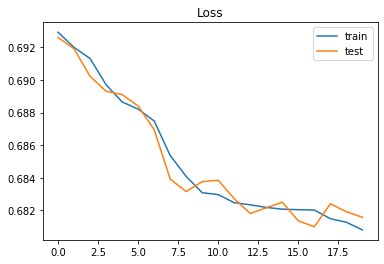

In [44]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

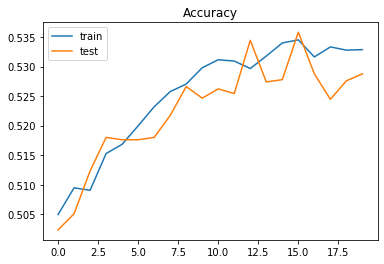

In [45]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [0]:
def predictor(str):
  new_tweet = [str]
  seq = tvec.transform(new_tweet)
  pred = model.predict(seq)
  if(np.argmax(pred)) == 0:
    return "Negative"
  else:
    return "Positive"

In [47]:
predictor('ูุฐุง ูุฑูู. ูููู ุงูุฏูููุฑุงุทููู: ุฑูุณูุง ุชููุชุฑ ูููุน ููุชููุจ ูููู ุฌูู ุดุชุงูู ูููููููุณ Antifa ุฃููููู ููู ุงูุญุฒุจ ูู ููุธุฑ ุฅูู ุงููุฑุขุฉ ููุฏุฑู ุฃูู ูุดู ุชูุงููุง ูู ุชุดููู ุชุญุฏ ุฐู ูุนูู ููุธูู ุงูุงุฌุชูุงุนู ูุงูุงูุชุตุงุฏู  ูุจุงูุชุงูู ููุฏ ุงูุฏุนู.')

'Positive'